# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

# Import data

In [2]:
delivered_data = pd.read_csv('../data/processed_data/olist_delivered_customers.csv') 

# Overview data

In [3]:
# Overview data
print('Shape:', delivered_data.shape)
delivered_data.head()

Shape: (96478, 17)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_number_of_items,total_order_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Brazil,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Brazil,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Brazil,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Brazil,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Brazil,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25


In [4]:
# Check null values
delivered_data.isnull().sum()

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
customer_country                  0
geolocation_lat                   0
geolocation_lng                   0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     0
order_estimated_delivery_date     0
total_number_of_items             0
total_order_value                 0
dtype: int64

In [5]:
# Check data types 
delivered_data.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
customer_country                  object
geolocation_lat                  float64
geolocation_lng                  float64
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
total_number_of_items              int64
total_order_value                float64
dtype: object

In [6]:
# Convert some columns below to datetime
delivered_data['order_purchase_timestamp'] = pd.to_datetime(delivered_data.order_purchase_timestamp, errors='coerce')
delivered_data['order_approved_at'] = pd.to_datetime(delivered_data.order_approved_at, errors='coerce')
delivered_data['order_delivered_carrier_date'] = pd.to_datetime(delivered_data.order_delivered_carrier_date, errors='coerce')
delivered_data['order_delivered_customer_date'] = pd.to_datetime(delivered_data.order_delivered_customer_date, errors='coerce')
delivered_data['order_estimated_delivery_date'] = pd.to_datetime(delivered_data.order_estimated_delivery_date, errors='coerce')

In [7]:
# Check data types again
delivered_data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
customer_country                         object
geolocation_lat                         float64
geolocation_lng                         float64
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
total_number_of_items                     int64
total_order_value                       float64
dtype: object

# Cohort Analysis

In [8]:
# Add column 'order_purchase_period' format 'Y-m'
delivered_data['order_purchase_period'] = delivered_data['order_purchase_timestamp'].dt.to_period('M')  
delivered_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_number_of_items,total_order_value,order_purchase_period
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Brazil,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Brazil,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Brazil,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Brazil,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Brazil,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25,2018-07


In [9]:
# Add column 'cohort_group' format 'Y-m'
delivered_data.set_index('customer_unique_id', inplace=True) 
delivered_data['cohort_group'] = delivered_data.groupby(level=0)['order_purchase_timestamp'].min().dt.to_period('M')
delivered_data.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_number_of_items,total_order_value,order_purchase_period,cohort_group
customer_unique_id,,,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,Brazil,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87,2017-05,2017-05
290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,Brazil,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48,2018-01,2018-01
060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,Brazil,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73,2018-05,2018-05
259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,Brazil,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30,2018-03,2018-03
345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,Brazil,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25,2018-07,2018-07


In [10]:
# Reset index
delivered_data.reset_index(inplace=True)
delivered_data.head()

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_number_of_items,total_order_value,order_purchase_period,cohort_group
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,Brazil,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,Brazil,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,Brazil,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,Brazil,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,Brazil,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25,2018-07,2018-07


In [11]:
# Create 'cohort_df'
cohort_df = delivered_data.groupby(['cohort_group','order_purchase_period']).agg({'customer_unique_id': 'nunique', 'total_order_value': 'sum'}) \
                          .rename(columns={'customer_unique_id': 'number_of_customers', 'total_order_value':'sales'})
print('Shape:', cohort_df.shape)
cohort_df.head()

Shape: (219, 2)


number_of_customers     sales
cohort_group order_purchase_period                               
2016-09      2016-09                                  1    286.92
2016-10      2016-10                                262  53892.73
             2017-04                                  1    111.30
             2017-07                                  1    356.13
             2017-09                                  1     56.78

In [12]:
# Create function to determine cohort period
def determine_cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) 
    return df

In [13]:
# Add column 'cohort_period' to cohort_df
cohort_df = cohort_df.groupby(level='cohort_group').apply(determine_cohort_period) 
cohort_df.head()

number_of_customers     sales  \
cohort_group order_purchase_period                                  
2016-09      2016-09                                  1    286.92   
2016-10      2016-10                                262  53892.73   
             2017-04                                  1    111.30   
             2017-07                                  1    356.13   
             2017-09                                  1     56.78   

                                    cohort_period  
cohort_group order_purchase_period                 
2016-09      2016-09                            0  
2016-10      2016-10                            0  
             2017-04                            1  
             2017-07                            2  
             2017-09                            3

In [14]:
# Replace invalid values of column 'cohort_period'
order_purchase_period_2016_10 = cohort_df.loc[cohort_df.index.get_level_values('cohort_group') == '2016-10'].index.get_level_values('order_purchase_period')
list_cohort_period_2016_10 = [0, 6, 9, 11, 13, 15, 17, 19, 20]

for var_order_purchase_period, var_cohort_period in zip(order_purchase_period_2016_10, list_cohort_period_2016_10):
    cohort_df.loc[(cohort_df.index.get_level_values('cohort_group') == '2016-10') &
                  (cohort_df.index.get_level_values('order_purchase_period') == var_order_purchase_period), 
                  'cohort_period'] = var_cohort_period
# View data    
cohort_df.head()

number_of_customers     sales  \
cohort_group order_purchase_period                                  
2016-09      2016-09                                  1    286.92   
2016-10      2016-10                                262  53892.73   
             2017-04                                  1    111.30   
             2017-07                                  1    356.13   
             2017-09                                  1     56.78   

                                    cohort_period  
cohort_group order_purchase_period                 
2016-09      2016-09                            0  
2016-10      2016-10                            0  
             2017-04                            6  
             2017-07                            9  
             2017-09                           11

In [15]:
# Set index using columns 'cohort_period', 'cohort_group'
cohort_df.reset_index(inplace=True)
cohort_df.set_index(['cohort_period','cohort_group'], inplace=True)
cohort_df.head()

order_purchase_period  number_of_customers  \
cohort_period cohort_group                                              
0             2016-09                    2016-09                    1   
              2016-10                    2016-10                  262   
6             2016-10                    2017-04                    1   
9             2016-10                    2017-07                    1   
11            2016-10                    2017-09                    1   

                               sales  
cohort_period cohort_group            
0             2016-09         286.92  
              2016-10       53892.73  
6             2016-10         111.30  
9             2016-10         356.13  
11            2016-10          56.78

## Retention

In [16]:
# Calculate cohort group size by getting first row of each group
cohort_group_size = cohort_df.groupby(level='cohort_group')['number_of_customers'].first()
cohort_group_size

cohort_group
2016-09       1
2016-10     262
2016-12       1
2017-01     717
2017-02    1628
2017-03    2503
2017-04    2256
2017-05    3451
2017-06    3037
2017-07    3752
2017-08    4057
2017-09    4004
2017-10    4328
2017-11    7060
2017-12    5338
2018-01    6842
2018-02    6288
2018-03    6774
2018-04    6582
2018-05    6506
2018-06    5878
2018-07    5949
2018-08    6144
Freq: M, Name: number_of_customers, dtype: int64

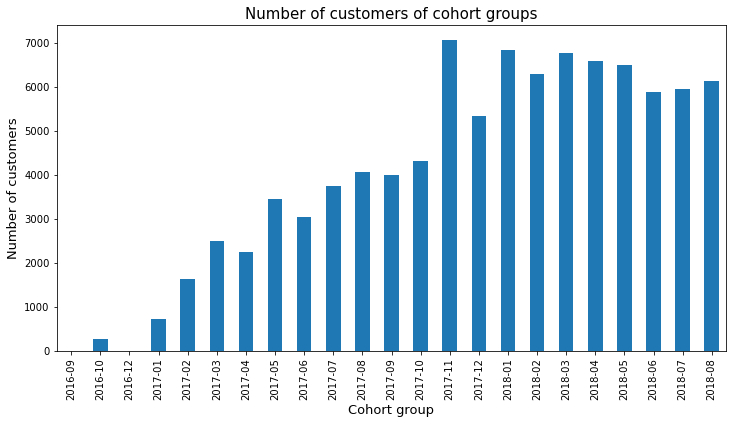

In [17]:
# Visualize number of customers of each cohort group
plt.figure(figsize=[12, 6])
cohort_group_size.plot.bar()
plt.title('Number of customers of cohort groups', fontsize=15)
plt.xlabel('Cohort group', fontsize=13)
plt.ylabel('Number of customers', fontsize=13)
plt.show()

**Comment:** Cohort groups are divided by month, so there can be fluctuations, but in general over time from 2016-09 to 2017-11, cohorts tend to increase in number of customers. Cohort group 2017-11 has the most customers with 7060 customers. Cohort groups that come after 2017-11 tend to be volatile, ranging from 5338 to 6842 customers.

In [18]:
# Customer retention rate of cohort groups over periods
retention = cohort_df['number_of_customers'].unstack('cohort_period')
retention.insert(loc=18, column='18', value=np.nan)
retention = retention.divide(cohort_group_size, axis=0)
retention

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
cohort_group,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.007634,0.007634
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,0.002789,0.001395,0.004184,0.001395,0.004184,0.001395,0.001395,0.004184,0.001395,0.006974,0.004184,0.001395,0.001395,0.002789,0.004184,0.001395,NaN,NaN,NaN
2017-02,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,0.003071,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,0.003596,0.001199,0.001998,0.001199,0.001598,0.002397,0.000799,0.001199,NaN,NaN,NaN
2017-04,1.0,0.006206,0.002216,0.001773,0.002660,0.002660,0.003546,0.003103,0.003103,0.001773,0.002660,0.000887,0.000443,0.000443,0.000887,0.000887,0.001330,NaN,NaN,NaN,NaN
2017-05,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,0.002608,0.002608,0.002608,0.003477,0.002318,0.000290,0.001739,0.002028,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.001317,0.001976,0.002963,0.003622,0.001646,0.001646,0.002305,NaN,NaN,NaN,NaN,NaN,NaN


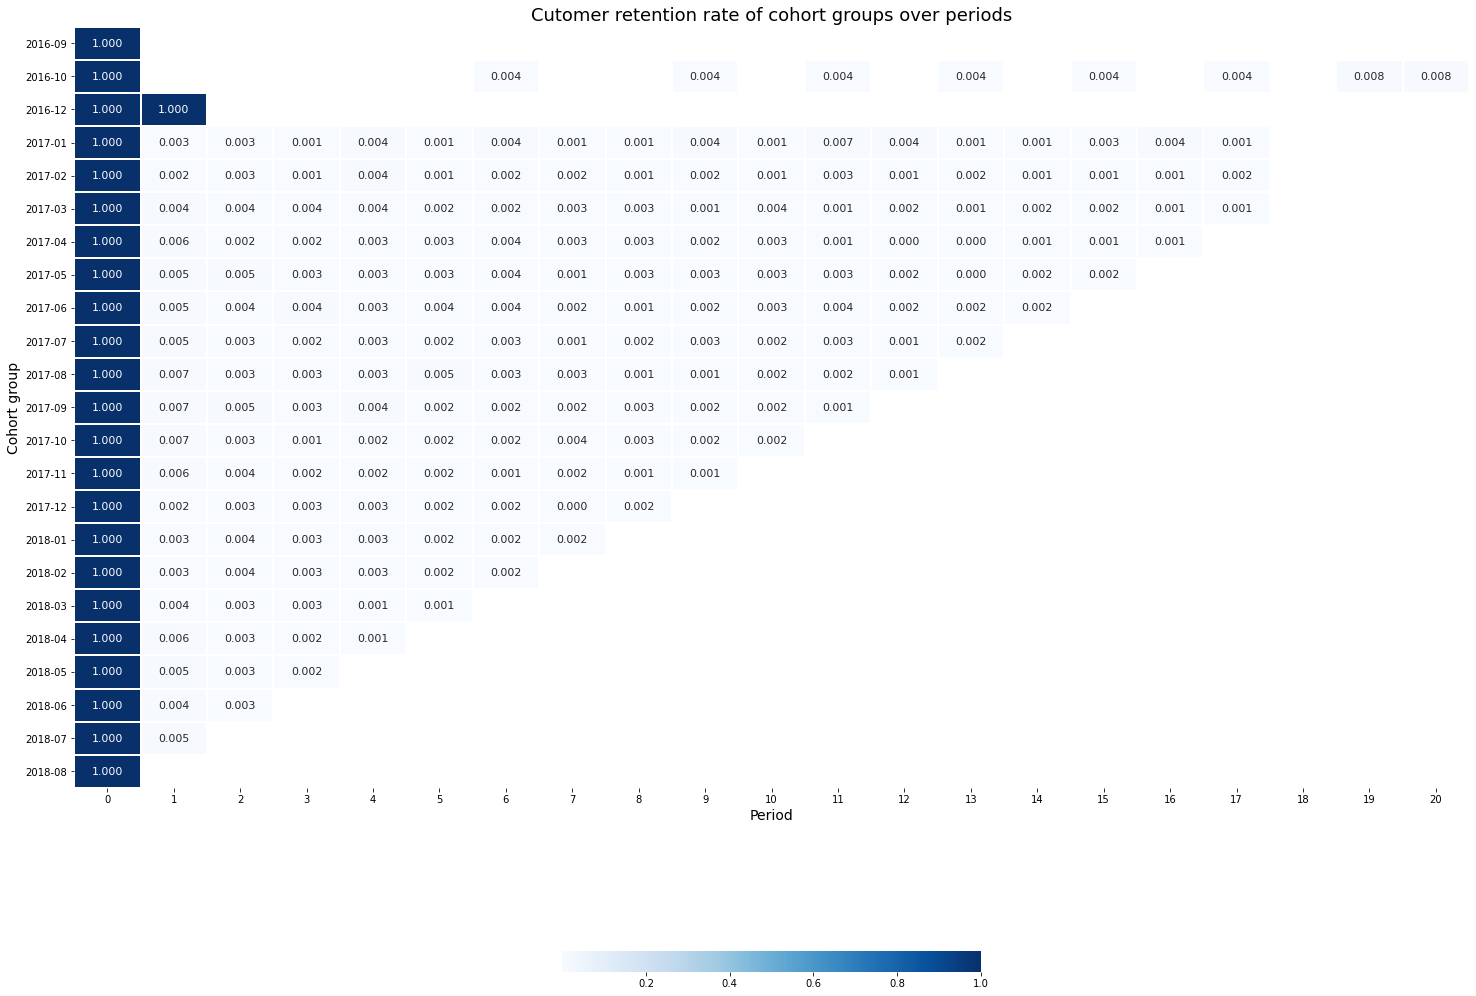

In [19]:
# Visualize customer retention rate of cohort groups over periods
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(retention, annot=True, cmap='Blues', fmt=',.3f', linewidths=1, annot_kws={'fontsize':11}, cbar_kws={'shrink':0.3, 'orientation':'horizontal'}, ax=ax)  
ax.set_xlabel('Period', fontsize=14)
ax.set_ylabel('Cohort group', fontsize=14) 
ax.set_title('Cutomer retention rate of cohort groups over periods', fontsize=18)
plt.show()

**Comment:** In fact, all of this data is only a small fraction of Olist's data. However, with the assumption that this is all customer data that has successfully delivered orders of Olist, it can be seen that Olist's ability to retain customers is really bad, shown in all corhort groups (customer retention rate < 0.01 - 1%).

## Monthly Sales

In [20]:
# Monthly sales of cohort groups over periods 
monthly_sales = cohort_df['sales'].unstack('cohort_period')
monthly_sales.insert(loc=18, column='18', value=np.nan)
monthly_sales

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
cohort_group,,,,,,,,,,,,,,,,,,,,,
2016-09,286.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,53892.73,NaN,NaN,NaN,NaN,NaN,111.30,NaN,NaN,356.13,NaN,56.78,NaN,327.06,NaN,381.00,NaN,116.57,NaN,384.01,181.37
2016-12,19.62,19.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,151760.74,111.07,114.70,89.70,246.25,69.33,678.07,167.27,47.05,427.05,66.60,748.08,351.65,145.55,104.61,219.35,354.43,50.93,NaN,NaN,NaN
2017-02,298013.62,481.68,605.05,118.73,1200.04,74.21,1028.88,274.30,464.61,715.95,343.22,454.39,279.24,397.11,181.66,136.79,437.52,369.65,NaN,NaN,NaN
2017-03,459696.56,1786.11,1878.31,1836.10,1234.25,1433.39,796.25,887.42,1786.05,237.96,755.84,492.58,907.29,238.58,733.59,926.83,203.88,339.25,NaN,NaN,NaN
2017-04,420857.20,3640.97,940.40,758.21,1158.30,1231.09,2944.66,2233.07,963.99,499.82,919.78,512.46,175.13,271.64,301.83,393.74,962.61,NaN,NaN,NaN,NaN
2017-05,626961.87,2481.94,4510.70,1992.73,1219.04,1812.40,3074.71,608.02,2855.26,1640.17,2137.10,1720.84,1056.81,62.33,869.27,1020.48,NaN,NaN,NaN,NaN,NaN
2017-06,531639.27,2941.21,3627.81,1578.18,2589.37,1745.41,2043.11,822.86,346.26,576.59,2718.53,2559.81,513.44,1047.89,2454.39,NaN,NaN,NaN,NaN,NaN,NaN


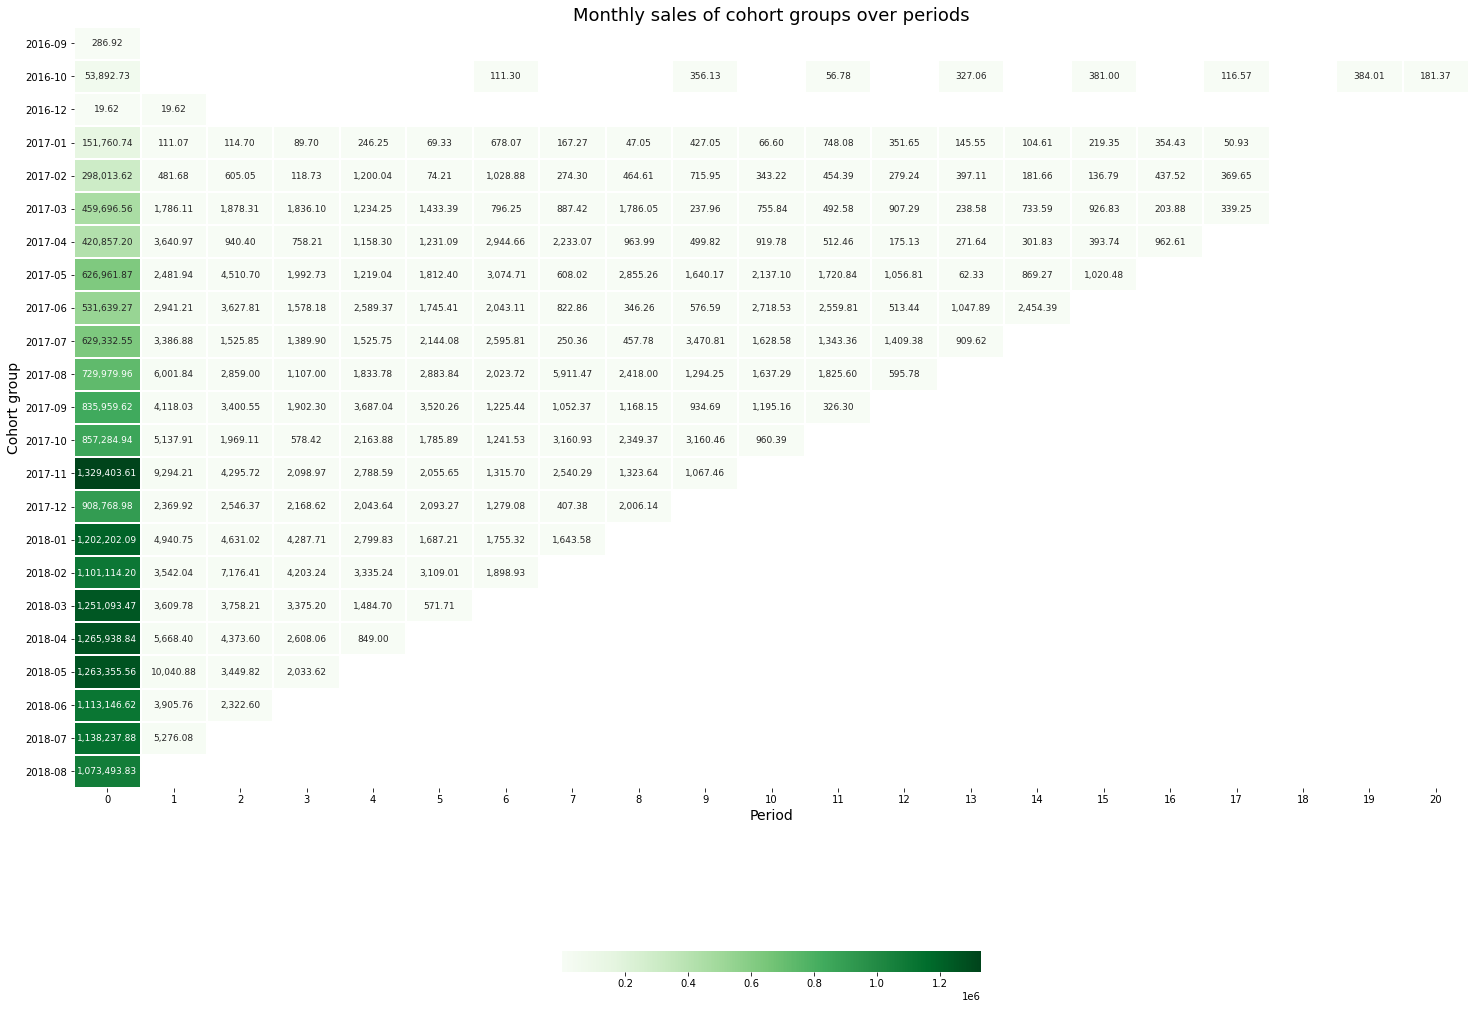

In [21]:
# Visualize monthly sales of cohort groups over periods
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(monthly_sales, annot=True, cmap='Greens', fmt=',.2f', linewidths=1, annot_kws={'fontsize':9}, cbar_kws={'shrink':0.3, 'orientation':'horizontal'}, ax=ax)  
ax.set_xlabel('Period', fontsize=14)
ax.set_ylabel('Cohort group', fontsize=14) 
ax.set_title('Monthly sales of cohort groups over periods', fontsize=18)
plt.show()

**Comment:** It can be seen that the first period sales of the cohort groups also fluctuate with the number of customers of these cohorts. Overall an uptrend until 2017-11 and then slight volatility. However, after the first period, in subsequent periods, the sales of the cohort groups yielded a sharp decline. This can be explained because Olist's customer retention rate is not as good as analyzed in the previous section.